In [42]:
import sqlite3

dbname = "multicampus.db"

conn = sqlite3.connect(dbname)
cur = conn.cursor() # db와 대화하는 통로

cur.execute("drop table student")
cur.execute("create table if not exists student(name, age, subject)")
cur.execute("insert into student values('유빈', 20,'통계')")
cur.execute("insert into student values('길동', 30,'통계')")
cur.execute("insert into student values('승희', 25,'통계')")
conn.commit()

cur.close()
conn.close()

In [43]:
conn = sqlite3.connect(dbname)
cur = conn.cursor()

cur.execute("select * from student")

for row in cur:
    print(row)

cur.close()
conn.close()

('유빈', 20, '통계')
('길동', 30, '통계')
('승희', 25, '통계')


In [393]:
conn = sqlite3.connect(dbname)
cur = conn.cursor()

values = [('성구', 26, '전공1'),
          ('경래', 25, '전공2'),
          ('지수', 24, '전공3')]
cur.executemany('insert into student values(?,?,?)', values)
conn.commit()

cur.close()
conn.close()

In [394]:
conn = sqlite3.connect(dbname)
cur = conn.cursor()

cur.execute("select * from student")
table = cur.fetchall()

for row in table:
    print(row)

cur.close()
conn.close()

('유빈', 20, '통계')
('길동', 30, '통계')
('승희', 25, '통계')
('성구', 26, '전공1')
('경래', 25, '전공2')
('지수', 24, '전공3')


# Oracle

In [29]:
!pip install cx_Oracle

In [64]:
import cx_Oracle

conn = cx_Oracle.connect("hr/hr@localhost:1521/xe")
cur = conn.cursor()

cur.execute('''select first_name, salary 
               from employees 
               where salary >= 15000''')

for row in cur:
    print(row)

cur.close()
conn.close()

('Steven', 24000.0)
('Neena', 17000.0)
('Lex', 17000.0)


In [100]:
import cx_Oracle

conn = cx_Oracle.connect("hr/hr@localhost:1521/xe")
cur = conn.cursor()

cur.execute('''select first_name, job_id, salary, department_name
                 from employees e left join departments d
                   on e.department_id = d.department_id''')

names = []
jobs = set()
total = 0
depts = set()

for row in cur:
    names.append(row[0])
    jobs.add(row[1])
    total += row[2]
    depts.add(row[3])

cur.close()
conn.close()

print("-"*50, "이름")
print(names)
print("-"*50, "직업")
print(jobs)
print("-"*50, "급여 총합")
print(total)
print("-"*50, "부서명")
print(depts)

-------------------------------------------------- 이름
['Jennifer', 'Pat', 'Michael', 'Karen', 'Guy', 'Sigal', 'Shelli', 'Alexander', 'Den', 'Susan', 'Douglas', 'Donald', 'Kevin', 'Alana', 'Vance', 'Samuel', 'Britney', 'Sarah', 'Randall', 'Timothy', 'Jennifer', 'Kelly', 'Anthony', 'Julia', 'Alexis', 'Nandita', 'Girard', 'Martha', 'Jean', 'Winston', 'Peter', 'Randall', 'Curtis', 'Trenna', 'Joshua', 'John', 'Stephen', 'Renske', 'Hazel', 'Ki', 'Michael', 'Jason', 'TJ', 'James', 'Mozhe', 'Laura', 'Steven', 'James', 'Irene', 'Julia', 'Kevin', 'Shanta', 'Payam', 'Adam', 'Matthew', 'Diana', 'Valli', 'David', 'Bruce', 'Alexander', 'Hermann', 'Charles', 'Jack', 'Jonathon', 'Alyssa', 'Ellen', 'Sundita', 'Elizabeth', 'William', 'Tayler', 'Harrison', 'Lisa', 'Amit', 'Sundar', 'David', 'Mattea', 'Danielle', 'Clara', 'Sarath', 'Louise', 'Lindsey', 'Allan', 'Patrick', 'Janette', 'Oliver', 'Nanette', 'Christopher', 'Peter', 'David', 'Peter', 'Eleni', 'Gerald', 'Alberto', 'Karen', 'John', 'Lex', 'Neena'

In [113]:
import pandas as pd

conn = cx_Oracle.connect("hr/hr@localhost:1521/xe")
df = pd.read_sql("select * from employees", conn)

df.iloc[1,1]
df.loc[1,"FIRST_NAME"]

'Neena'

In [117]:
pd.read_sql("select * from departments", conn)

,DEPARTMENT_ID,DEPARTMENT_NAME,MANAGER_ID,LOCATION_ID
0,10,Administration,200.0,1700
1,20,Marketing,201.0,1800
2,30,Purchasing,114.0,1700
3,40,Human Resources,203.0,2400
4,50,Shipping,121.0,1500
5,60,IT,103.0,1400
6,70,Public Relations,204.0,2700
7,80,Sales,145.0,2500
8,90,Executive,100.0,1700
9,100,Finance,108.0,1700


# 크롤링

In [118]:
# get 방식 : 주소창에 전송 데이터가 보임
# post 방식 : 주소창에 보이지 않고 전송문서에 body 부분에 숨겨서 가져감
https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=105
https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q=%ED%8C%8C%EC%9D%B4%EC%8D%AC

SyntaxError: invalid syntax (<ipython-input-118-c2cb003e0301>, line 3)

In [137]:
import requests
import re # 정규표현식 모듈

url = "https://www.daum.net/"
response = requests.get(url)

response.ok
response.status_code # 200 : 성공, 404 : 페이지 없음, 500 : 프로그램 오류

response.text[:100]

s = response.text
alist = re.findall("코로나", s)
print(alist, len(alist))

['코로나', '코로나', '코로나', '코로나', '코로나', '코로나', '코로나', '코로나', '코로나'] 9


In [146]:
response.headers

response.headers["X-UA-Device-Type"]

'pc'

In [167]:
url = "https://news.naver.com/main/main.nhn"
h = ""
p = {"mode":"LSD","mid":"shm","sid1":"105"} # 파라미터
p2 = [("mode","LSD"),("mid","shm"),("sid1","101")]

response = requests.get(url, headers = h, params=p2)
response.text[1000:2000]

'itle"       content="경제 : 네이버 뉴스">\r\n<meta property="og:type"        content="website">\r\n<meta property="og:url"         content="http://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=101">\r\n<meta property="og:image"       content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_20160804.png"/>\r\n<meta property="og:description" content="증권, 금융, 부동산, 기업, 국제 등 경제 분야 뉴스 제공">\r\n<meta property="og:article:author"\tcontent="네이버"/>\r\n\r\n<meta name="twitter:card"\t\tcontent="summary">\r\n<meta name="twitter:title"\t\tcontent="경제 : 네이버 뉴스">\r\n<meta name="twitter:site"       content="네이버 뉴스">\r\n<meta name="twitter:creator"    content="네이버 뉴스">\r\n<meta name="twitter:image"\t\tcontent="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_20160804.png">\r\n<meta name="twitter:description" content="증권, 금융, 부동산, 기업, 국제 등 경제 분야 뉴스 제공">\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n<title>경제 홈 : 네이버 뉴스\t</title>\r\n<link rel="shortcut icon" type="image/x-icon"

파일 저장 중___________길이는 15858


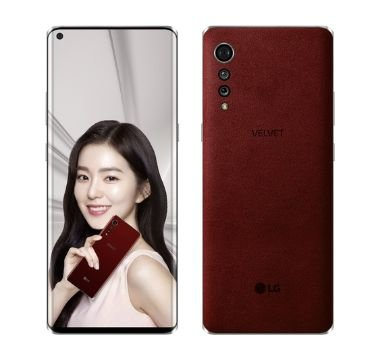

In [171]:
# 이미지를 PC에 저장
url = "https://imgnews.pstatic.net/image/025/2020/08/14/0003026114_002_20200814112807674.jpg?type=w647"
response = requests.get(url)
    
with open("aa.jpg","wb") as f:
    print("파일 저장 중___________길이는 {}".format(len(response.content)))
    f.write(response.content)

from IPython.display import Image
Image(filename="aa.jpg")

In [220]:
url = "https://api.bithumb.com/public/ticker/all"

response = requests.get(url)
response.text

datas = response.json()
# datas["data"]["BTC"]["closing_price"]
datas

for key, val in datas["data"].items():
    if key=="data": break
    print(key, val["closing_price"])

BTC 13761000
ETH 496500
DASH 107900
LTC 66250
ETC 8125
XRP 344.3
BCH 342400
ZEC 99600
QTUM 3373
BTG 12730
EOS 3655
ICX 591.1
TRX 27.37
ELF 131.6
MCO 6280
OMG 2170
KNC 2218
GNT 86.75
ZIL 29.58
WAXP 61.69
POWR 122
LRC 197
STEEM 268.8
STRAT 745.9
AE 213.3
ZRX 535
REP 24570
XEM 72.28
SNT 34.87
ADA 164
CTXC 162.5
BAT 314.5
WTC 668
THETA 480.1
LOOM 30.1
WAVES 3691
ITC 189.1
TRUE 381.7
LINK 20500
RNT 32.47
ENJ 247.6
VET 23.55
MTL 431.5
INS 241.8
IOST 7.585
TMTG 29.94
QKC 9.72
BZNT 10.67
HDAC 28.52
NPXS 0.2525
LBA 43.47
WET 16.39
AMO 0.872
BSV 247900
DAC 5.199
ORBS 21.58
VALOR 520.5
CON 4.99
ANKR 15.54
MIX 4.437
LAMB 32.11
CRO 190.5
FX 109.1
CHR 85.5
MBL 2.607
MXC 20.94
FAB 9.37
OGO 19.26
DVP 18.48
FCT 98.93
FNB 5.58
TRV 32.21
PCM 17.21
DAD 360.2
AOA 13.55
XSR 17.21
WOM 212
SOC 16.3
EM 5.456
QBZ 14.07
BOA 83.2
FLETA 10
SXP 4990
COS 11.51
APIX 163.8
EL 4.096
BASIC 7.84
XPR 21.1
EGG 9.12
BORA 49.4
ARPA 47.63
ANW 281.4
BCD 962.6
XLM 118.3
PIVX 593.1
GXC 845.9
BTT 0.555
HYC 4.199
VSYS 35.28
IPX 99

TypeError: string indices must be integers

In [221]:
datas["data"]["ALGO"]["closing_price"]

'799'

In [222]:
import pandas as pd

df = pd.read_json(url)
df.loc['BTC','data']["closing_price"]

'13761000'

In [250]:
url = "https://finance.naver.com/sise/"
selector = "#KOSPI_now"

html = requests.get(url).text     # html 페이지 내용이 문자로 입력
bs = BeautifulSoup(html, "html.parser")  

bs.select(selector)[0].text

'2,405.42'

In [239]:
from bs4 import BeautifulSoup

url = "https://www.daum.net/"
html = requests.get(url).text

#wrapSearch > div.slide_favorsch > ul:nth-child(2) > li:nth-child(5) > a
#wrapSearch > div.slide_favorsch > ul:nth-child(2) > li:nth-child(1) > a

bs = BeautifulSoup(html, "html.parser")
alist = bs.select("#wrapSearch>div.slide_favorsch>ul>li>a")

# 모든 실검 정보 출력
for idx, row in enumerate(alist):
    print(idx, row.text, row["href"])

0 생활 속 거리두기 https://search.daum.net/search?w=tot&q=%EC%83%9D%ED%99%9C+%EC%86%8D+%EA%B1%B0%EB%A6%AC%EB%91%90%EA%B8%B0&DA=NPI
1 홍빈 입대발표 https://search.daum.net/search?w=tot&q=%ED%99%8D%EB%B9%88+%EC%9E%85%EB%8C%80&DA=NPI&rtmaxcoll=NNS
2 지리산둘레길 https://search.daum.net/search?w=tot&q=%EC%A7%80%EB%A6%AC%EC%82%B0%EB%91%98%EB%A0%88%EA%B8%B8&DA=NPT
3 박유나 여신강림 https://search.daum.net/search?w=tot&q=%EB%B0%95%EC%9C%A0%EB%82%98+%EC%97%AC%EC%8B%A0%EA%B0%95%EB%A6%BC&DA=NPI&rtmaxcoll=NNS
4 4인용식탁세트 https://search.daum.net/search?w=tot&q=4%EC%9D%B8%EC%9A%A9%EC%8B%9D%ED%83%81%EC%84%B8%ED%8A%B8&DA=NPT
5 코로나19 발생현황 https://search.daum.net/search?w=tot&q=%EC%BD%94%EB%A1%9C%EB%82%9819+%EB%B0%9C%EC%83%9D%ED%98%84%ED%99%A9&DA=NPI
6 박보미 결혼 https://search.daum.net/search?w=tot&q=%EB%B0%95%EB%B3%B4%EB%AF%B8+%EA%B2%B0%ED%98%BC&DA=NPI&rtmaxcoll=NNS
7 도장추천 https://search.daum.net/search?w=tot&q=%EB%8F%84%EC%9E%A5&DA=NPT
8 강성연 전속계약 https://search.daum.net/search?w=tot&q=%EA%B0%95%EC%84%B1%EC%97%B0+%EC%A0%84%EC%86%8D

In [266]:
from bs4 import BeautifulSoup
import urllib.parse

url = "https://www.daum.net/"
html = requests.get(url).text

bs = BeautifulSoup(html, "html.parser")
alist = bs.find_all("div",{"class":"slide_favorsch"})
blist = alist[0].find_all('a')

for aa in blist:
    print(aa.text, urllib.parse.unquote_plus(aa["href"]))

생활 속 거리두기 https://search.daum.net/search?w=tot&q=생활 속 거리두기&DA=NPI
홍빈 입대발표 https://search.daum.net/search?w=tot&q=홍빈 입대&DA=NPI&rtmaxcoll=NNS
월풀욕조추천 https://search.daum.net/search?w=tot&q=월풀욕조&DA=NPT
박유나 여신강림 https://search.daum.net/search?w=tot&q=박유나 여신강림&DA=NPI&rtmaxcoll=NNS
콜라겐추천 https://search.daum.net/search?w=tot&q=콜라겐추천&DA=NPT
코로나19 발생현황 https://search.daum.net/search?w=tot&q=코로나19 발생현황&DA=NPI
박보미 결혼 https://search.daum.net/search?w=tot&q=박보미 결혼&DA=NPI&rtmaxcoll=NNS
건조기추천 https://search.daum.net/search?w=tot&q=건조기&DA=NPT
강성연 전속계약 https://search.daum.net/search?w=tot&q=강성연 전속계약&DA=NPI&rtmaxcoll=NNS
미니냉장고 https://search.daum.net/search?w=tot&q=미니냉장고&DA=NPT
고준희 계약해지 https://search.daum.net/search?w=tot&q=고준희 계약해지&DA=NPI&rtmaxcoll=NNS
자이언트핑크 결혼 https://search.daum.net/search?w=tot&q=자이언트핑크 결혼&DA=NPI&rtmaxcoll=NNS
보도블럭종류 https://search.daum.net/search?w=tot&q=보도블럭종류&DA=NPT
권민아 화보 https://search.daum.net/search?w=tot&q=권민아 화보&DA=NPI&rtmaxcoll=NNS
캠프라인등산화 https://search.daum.net/search?w

In [336]:
import os
outputDir = os.getcwd() + "/images2"

if not os.path.isdir(outputDir):
    os.makedirs(outputDir)

TypeError: 'str' object is not callable

In [340]:
import os

url = "https://comic.naver.com/webtoon/detail.nhn?titleId=20853&no=1231&weekday=tue"
selector="#comic_view_area > div.wt_viewer"

html = requests.get(url).text
soup = BeautifulSoup(html, "html.parser")
div = soup.find_all("div", {"class":"wt_viewer"})

h = {
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.125 Safari/537.36",
    "referer":"https://www.naver.com/"
}

for imgTag in div[0].find_all("img"):
    src = imgTag["src"]
    imageData = requests.get(src, headers=h)
    filename = os.path.basename(src)
    filename = outputDir + "/" + filename
    
    with open(filename, "wb") as f:
        print(filename, "저장합니다")
        f.write(imageData.content)

/images2/20200615150805_9ec952b4694e673de10ad7ca5161e2d5_IMAG01_1.jpg 저장합니다
/images2/20200615150805_9ec952b4694e673de10ad7ca5161e2d5_IMAG01_2.jpg 저장합니다
/images2/20200615150805_9ec952b4694e673de10ad7ca5161e2d5_IMAG01_3.jpg 저장합니다
/images2/20200615150805_9ec952b4694e673de10ad7ca5161e2d5_IMAG01_4.jpg 저장합니다
/images2/20200615150805_9ec952b4694e673de10ad7ca5161e2d5_IMAG01_5.jpg 저장합니다
/images2/20200615150805_9ec952b4694e673de10ad7ca5161e2d5_IMAG01_6.jpg 저장합니다
/images2/20200615150805_9ec952b4694e673de10ad7ca5161e2d5_IMAG01_7.jpg 저장합니다
/images2/20200615150805_9ec952b4694e673de10ad7ca5161e2d5_IMAG01_8.jpg 저장합니다
/images2/20200615150805_9ec952b4694e673de10ad7ca5161e2d5_IMAG01_9.jpg 저장합니다
/images2/20200615150805_9ec952b4694e673de10ad7ca5161e2d5_IMAG01_10.jpg 저장합니다
/images2/20200615150805_9ec952b4694e673de10ad7ca5161e2d5_IMAG01_11.jpg 저장합니다
/images2/20200615150805_9ec952b4694e673de10ad7ca5161e2d5_IMAG01_12.jpg 저장합니다
/images2/20200615150805_9ec952b4694e673de10ad7ca5161e2d5_IMAG01_13.jpg 저장합니다
/images2

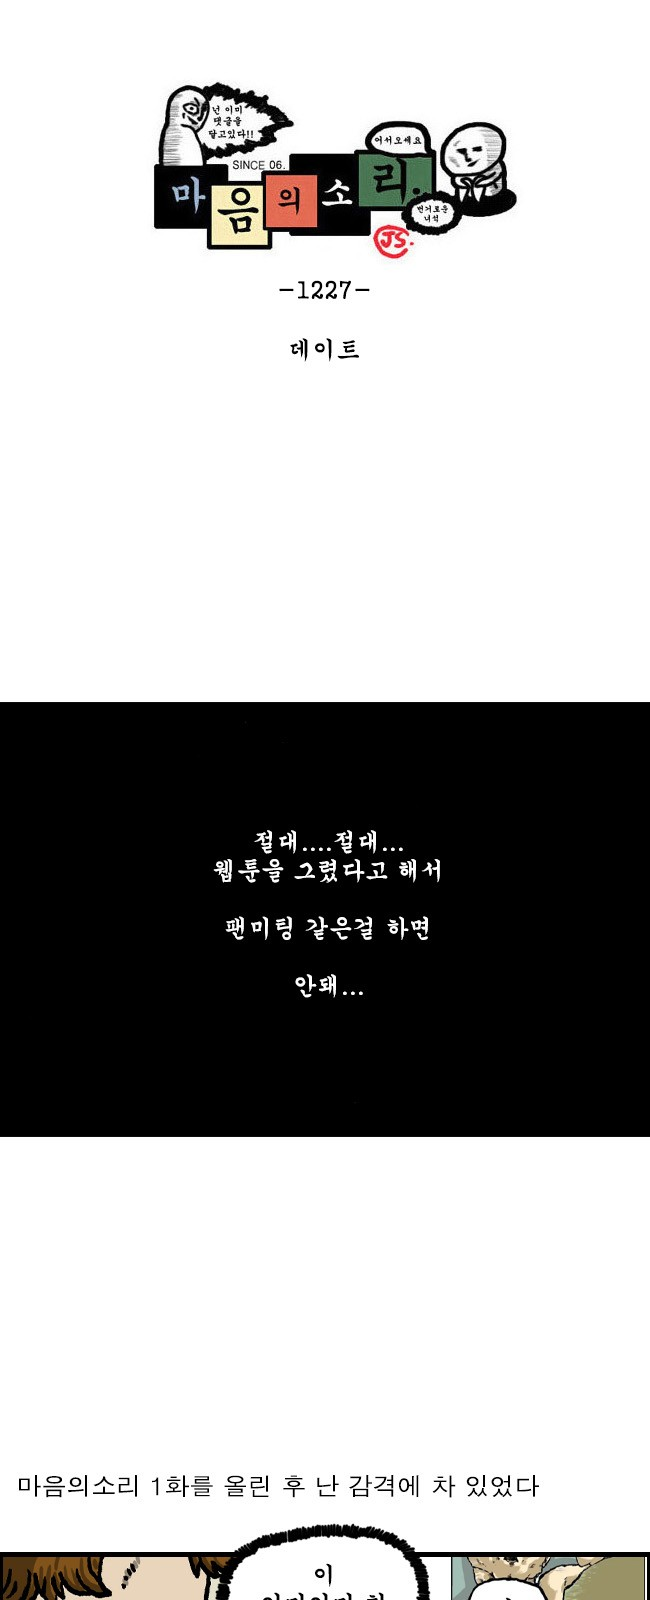

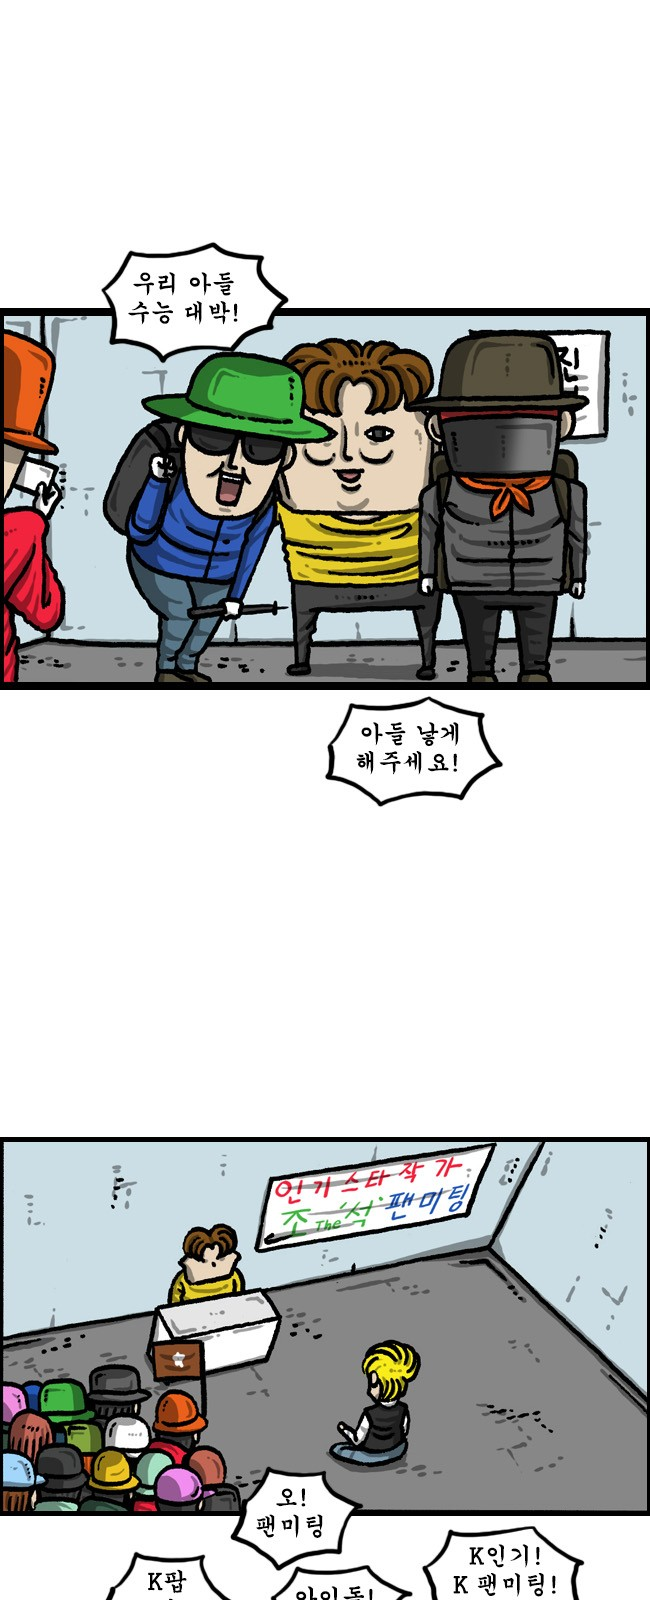

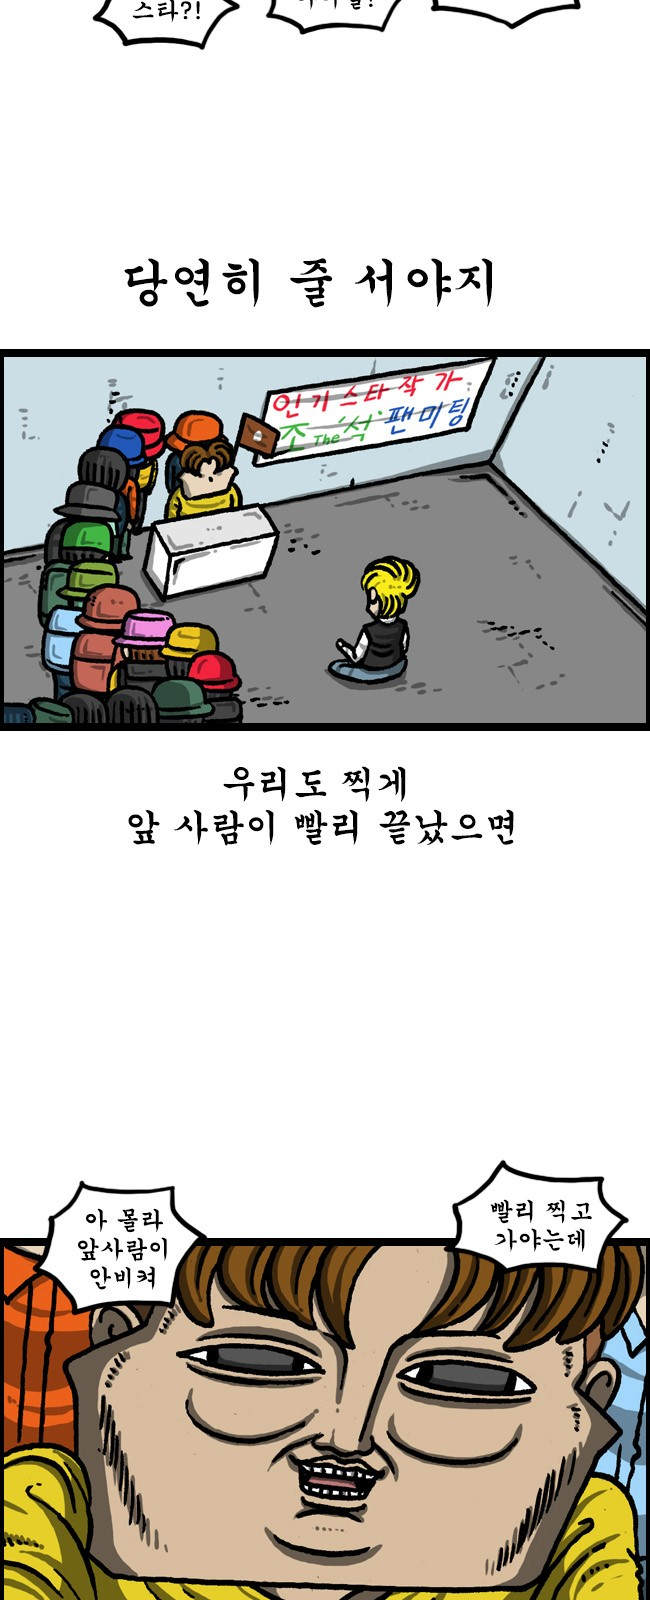

In [343]:
from IPython.display import Image
import glob

jpglist = glob.glob(outputDir + "/*.jpg")

for img in jpglist[:3]:
    display(Image(filename=img))

In [344]:
from bs4 import BeautifulSoup
import urllib.parse
import os

url = "https://www.melon.com/chart/"
selector = "div.ellipsis.rank01>span>a"

h = {
    "User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.125 Safari/537.36",
    "referer":"https://www.melon.com/chart/"
}

html = requests.get(url, headers = h).text
soup = BeautifulSoup(html, "html.parser")

songlist = soup.select(selector)

for idx, atag in enumerate(songlist):
    print(idx, atag.text)

0 다시 여기 바닷가
1 마리아 (Maria)
2 그 여름을 틀어줘
3 How You Like That
4 Summer Hate (Feat. 비)
5 눈누난나 (NUNU NANA)
6 Downtown Baby
7 에잇(Prod.&Feat. SUGA of BTS)
8 여름 안에서 by 싹쓰리 (Feat. 황광희)
9 홀로
10 아로하
11 Dolphin
12 LINDA (Feat. 윤미래)
13 신난다 (Feat. 마마무)
14 보라빛 밤 (pporappippam)
15 살짝 설렜어 (Nonstop)
16 Dance Monkey
17 사랑하게 될 줄 알았어
18 어떻게 지내 (Prod. By VAN.C)
19 Memories
20 덤디덤디 (DUMDi DUMDi)
21 METEOR
22 Into the I-LAND
23 Don't Start Now
24 Blueming
25 흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야
26 취기를 빌려 (취향저격 그녀 X 산들)
27 아무노래
28 처음처럼
29 어떻게 이별까지 사랑하겠어, 널 사랑하는 거지
30 MORE & MORE
31 시작
32 PLAY (Feat. 창모)
33 2002
34 늦은 밤 너의 집 앞 골목길에서
35 좋은 사람 있으면 소개시켜줘
36 나비와 고양이 (feat.백현 (BAEKHYUN))
37 사랑은 지날수록 더욱 선명하게 남아
38 오늘도 빛나는 너에게 (To You My Light) (Feat.이라온)
39 Monster
40 마음을 드려요
41 작은 것들을 위한 시 (Boy With Luv) (Feat. Halsey)
42 모든 날, 모든 순간 (Every day, Every Moment)
43 Psycho
44 거짓말이라도 해서 널 보고싶어
45 Maniac
46 우리 왜 헤어져야 해
47 ON
48 OCEAN VIEW (Feat.찬열)
49 When We Disco (Duet with 선미)
50 이제 나만 믿어요
51 Paris In The Rain
52 안녕
53 덤더럼 (Dumhdur

In [396]:
url = "https://search.naver.com/search.naver?date_from=&date_option=0&date_to=&dup_remove=1&nso=&post_blogurl=&post_blogurl_without=&query=%EC%A0%9C%EC%A3%BC%EC%97%AC%ED%96%89&sm=tab_pge&srchby=all&st=sim&where=post&"

for page in range(1,4):
    print(page, "페이지-------------")
    spage = (page-1)*10+1
    html = requests.get(url + "start=" + str(spage)).text
    soup = BeautifulSoup(html, "html.parser")
    lilist = soup.find_all("li",{"class":"sh_blog_top"})
    
    for aa in lilist:
        bb = aa.find("a",{"class":"sh_blog_title"})
        print(bb.text)

1 페이지-------------
7월 제주 여행 여기가 딱이네
수국길에 신난 제주 여행
샤려니숲길 한라산둘레길 산책 2020년 4월 제주여행 중...
국내 여름휴가 추천 2박3일제주여행 한다면 제주 오름 고근산
제주여행 티웨이 취소 후 제주항공 이용한 후기
6월에 가기 좋은 제주 여행
가족과 함께 2박3일 제주여행 다녀왔어요 !
제주여행♥ - 카페 두갓, 카페 이너프, 크랩잭
국내여행:) 친구와 함께하는 제주여행, 중문서핑 & 여행기
제주 여행 서쪽오름 금오름 일몰과 서쪽 풍경을 한눈에!
2 페이지-------------
5월 제주여행, 수국과 장미가 6월에도 있는 북촌에가면
제주여행 구좌읍 바다앞 경치좋은 카페록록
제주여행 수국이 있는 제주도 카멜리아힐
탐나오로 안전한 8월 제주여행 특가로 다녀오세요
여름, 제주 여행 2-3일차.
7월 8월 제주여행 수국에 반한 완벽한 동쪽코스
7월의 제주여행 - 시작은 제주공항에서
제주여행 더럭분교 알록달록 기분좋은 공간 (지금...
제주여행 천지연폭포 야경 보러 가다! ♥
제주 여행 :: 스타벅스 소소하게 찍어본 한정메뉴+MD _ 가격 도랏
3 페이지-------------
제주 여행준비1 - 2020 JEJU stay :-)
(애견동반 식당) 제주여행 초밥 땡길땐 스시혼 제주 노형동...
5월 제주여행 화조원 알파카,앵무새와 시간을!
제주여행 - 온 가족 영실탐방로 풍경에 취하다
3박 4일 제주여행 - 6개월 만에 찾은 제주에서 수국은 물론...
[제주 여행] 제주 세화 해변
제주여행코스 광치기해변
[제주도민 추천] 제주 여행지 ‘해안누리길50코스’
5월 제주여행 휴애리 수국축제 가야죠
재미난 자동차 이야기 제주여행 자동차박물관


# Selenium

In [18]:
from selenium import webdriver
import time

browser = webdriver.Chrome("C:\driver\chromedriver.exe")
browser.get("http://python.org")

menus = browser.find_elements_by_css_selector("#top > nav > ul > li")

for m in menus:
    print(m.text)
    if m.text == "PyPI":
        pp = m
        break

pp.click()

time.sleep(5)
browser.quit()

Python
PSF
Docs
PyPI


In [21]:
from bs4 import BeautifulSoup
import urllib.parse
from selenium import webdriver
import time

browser = webdriver.Chrome("C:\driver\chromedriver.exe")

url = "https://www.w3schools.com/colors/colors_rgb.asp"
browser.get(url)
time.sleep(2)

browser.find_element_by_css_selector("#r01").clear()
browser.find_element_by_css_selector("#r01").send_keys("0")
browser.find_element_by_css_selector("#g01").send_keys("255")
browser.find_element_by_css_selector("#b01").send_keys("255")

html = browser.page_source
soup = BeautifulSoup(html, "html.parser")
color = soup.find("div",{"id":"hex01"}).text

print(color)

#00ffff


In [26]:
import requests, json, locale
headers = {"Referer" : "http://search-tour.interpark.com/PC/",
           "User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.109 Safari/537.36"}

params = {"word" : "제주",
          "categorycode1" : "R",
          "offset" : 1,
          "pageSize" : 10,
          "filterFlag" : "false"}

#oldurl="http://search-tour.interpark.com/Payco/Search/GetPaycoResultForCategory"
url = "http://search-tour.interpark.com/Payco/Search/GetPaycoResultForCategory"

with requests.post(url, headers = headers, params = params) as response :
    #print(response.text)
    jsonObject = json.loads(response.text)
    datalist = jsonObject["datalist"]
    
    #locale.setlocale(locale.LC_ALL, '')
    for idx, data in enumerate(datalist) :
        print("---------- {}. {} ----------".format(idx+1, data["goodsname"]))
        print("airline: {}\nprice: \ {}\ngoodsurl: {}\ntripday: {}\ncontent:{}".format(data["airline"],
                locale.format_string('%.3d', float(data["price"]), 1), data["goodsurl"], data["tripday"], data["content1"]))
        print()

---------- 1. [보홀 항공권 4일] 제주항공 왕복항공권 ----------
airline: 제주항공
price: \ 513000
goodsurl: http://tour.interpark.com/goods/detail/?BaseGoodsCd=R1010761
tripday: 3박4일
content:인천-보홀-인천, 보홀 오전출발 3박4일 왕복항공권, 매일출발, 기간연장 및 리턴변경 불가, 기내식,음료,담요 불포함  현지공항세 불포함, 1인당 일반수하물 15KG, 기내반입 7KG 포함

---------- 2. [북해도 4일]윌드체인 쉐라톤+천연온천♨ +시마무이 해안_제주항공 ----------
airline: 제주항공
price: \ 749000
goodsurl: http://tour.interpark.com/goods/detail/?BaseGoodsCd=A6013434
tripday: 3박4일
content:인천-신치토세-키로로-샤코탄-오타루-니세코-도야-노보리베츠-삿포로-시코츠-신치토세-인천, 딱좋은 출발시간 12:20 출발 제주항공,월드체인 쉐라톤 온천 1박+ 니세코 온천 호텔 1박+삿포로 시내호텔 1박, 샤코탄노보리베츠도야오타루삿포로 핵심일정, 시마무이 해안카무이 미사키지옥계곡오타루운하삿포로 장외시장

---------- 3. [사이판 4일] PIC GOLD+마나가하섬+BBQ_제주항공 ----------
airline: 제주항공
price: \ 951600
goodsurl: http://tour.interpark.com/goods/detail/?BaseGoodsCd=A4012800
tripday: 3박4일
content:인천-사이판-인천, 전일정 호텔식사골드카드, 다양한키즈프로그램-키즈클럽나눔씨앗, 워터파크시설 및 슬라이드시설 보유, 아일랜드관광마나가하섬 포함

---------- 4. [사이판 4일] 월드리조트 골드+BBQ+마나가하섬_제주항공 ----------
airline: 제주항공
price: \ 982800
goodsurl: http:/

In [27]:
#크롤링 ...F12...select....불가경우 
#자동화 .....셀레니엄 ...속도늦어 
#F12/network/XHR에 제공되는지?제공된다면 가장 happy 

import requests, json, locale
headers = {"Referer" : "http://search-tour.interpark.com/PC/", "User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.109 Safari/537.36"}
params = {"word" : "제주", "categorycode1" : "R", "offset" : 1, "pageSize" : 10, "filterFlag" : "false"}
#oldurl="http://search-tour.interpark.com/Payco/Search/GetPaycoResultForCategory"
url = "http://search-tour.interpark.com/Payco/Search/GetPaycoResultForCategory"
s = requests.post(url, headers = headers, params = params).text
json.loads(s)['datalist']

[{'goodsid': {'categorycode1': 'R', 'goodscode': 'R1010761'},
  'profilerank': None,
  '_ID': '',
  'category1': '해외여행',
  'category2': '그룹항공권',
  'category3': '세부/보홀/보라카이/팔라완',
  'category4': '필리핀 [단체항공권]',
  'categorycode1': 'R',
  'categorycode2': 'R',
  'categorycode3': None,
  'categorycode4': None,
  'docId': None,
  'id': 'R1010761!RRR1010761',
  'latitude': '0.0',
  'longitude': '0.0',
  'rank': 0,
  'goodscode': 'R1010761',
  'region1': '필리핀',
  'region2': '보홀',
  'regioncode1': 'PHI',
  'regioncode2': 'BOL',
  'relevance': None,
  'spottype': None,
  'terms': ' 보홀 항공권 4일 제주항공 왕복항공권 땡처리 보홀 보홀직항 제주항공 팡라오 필리핀 항공권  R1010761   ',
  'viewcnt': 0,
  'salecnt': '0',
  'price': '513000',
  'commentcount': '0',
  'customervaluation': '0.0',
  'imageurl': 'http://tourimage.interpark.com/product/tour/00161/R10/280/R1010761_1_890.jpg',
  'goodsname': '[보홀 항공권 4일] 제주항공 왕복항공권',
  'goodstype': '기초',
  'goodsgrade': '특가',
  'goodsname_kr': '[보홀 항공권 4일] 제주항공 왕복항공권',
  'goodsname_en': None,
  '